In [530]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.display import HTML

In [484]:
HTML(
'''
<style>
h1.head {
    color: blue;
    font-weight: bold;
    text-align: center;
    font-size: 50px
}

h2.head{
    color: darkbrown;
    font-weight:bold;
    font-size: 40px


}
h3.head {
    color: black;
    font-weight: bold;
    font-size:30px;
    background-image: linear-gradient(90deg,grey, white);
    shadow:True;
      height: 40px;

}

p.gen {
    color: black;
    font-weight: regular;
    font-size: 20px;
    text-align: justify
}
p.head {
     color: blue;
    font-weight: bold;
    font-size: 20px;
    text-align: justify
}

</style>
'''


)

In [225]:
def data_survey(df):
    dtypes = df.dtypes
    missing_values = df.isnull().sum()
    missing_ration = (df.isnull().sum()/df.shape[0]*100).round(2)
    nuniques = df.nunique()
    uniques = df.apply(lambda x: x.unique())
    result = pd.DataFrame([dtypes, missing_values, missing_ration, nuniques, uniques]).T
    result.columns = ['Dtypes', 'Missing_values', 'Missing_ration', 'Nuniques','Uniques']
    return result

def filter_labels(string_contain_labels):
    list_items = re.split('(\d+)', string_contain_labels)
    list_items[:-1]
    # items_a1[:-1]
    results = {}
    for i in range(len(list_items)-1):
        if list_items[i].isdigit():
    #         float(items_a1[1])
            continue
        else:
            results.update({int(list_items[i+1]): list_items[i][:-2].strip()})
    return results
    
    


<h1 class=head>EXPLAINATION TASK</h1>

In [5]:
# !pip install google-cloud-vision

In [7]:
import re

In [29]:
with open('readme.txt', 'rb') as f:
    content = f.read()
text = str(content)[2:-1]
text

'The meaning of each attribute (column) in train_data.txt Column Meaning Column 1: Customer Subtype, see Appendix AL Column 2: Number of houses Column 3: Avg size household Column 4: Avg age, see Appendix A2 Column 5: Customer main type, see Appendix A3 Column 6: Roman catholic, see Appendix Ad Column 7: Protestant... Column 8: Other religion Column 9: No religion Column 10: Married Column 11: Living together Column 12: Other relation Column 13: Singles Column 14: Household without children Column 15: Household with children Column 16: High level education Column 17: Medium level education Column 18: Lower level education Column 19: High status Column 20: Entrepreneur Column 21: Farmer Column 22: Middle management Column 23: Skilled labourers Column 24: Unskilled labourers Column 25: Social class A Column 26: Social class B1 Column 27: Social class B2 Column 28: Social class C Column 29: Social class D Column 30: Rented house Column 31: Home owners Column 32: 1 car Column 33: 2 cars Co

In [421]:
columns_name_1_40 = 'Column 1: Customer Subtype, see Appendix AL Column 2: Number of houses Column 3: Avg size household Column 4: Avg age, see Appendix A2 Column 5: Customer main type, see Appendix A3 Column 6: Roman catholic, see Appendix Ad Column 7: Protestant... Column 8: Other religion Column 9: No religion Column 10: Married Column 11: Living together Column 12: Other relation Column 13: Singles Column 14: Household without children Column 15: Household with children Column 16: High level education Column 17: Medium level education Column 18: Lower level education Column 19: High status Column 20: Entrepreneur Column 21: Farmer Column 22: Middle management Column 23: Skilled labourers Column 24: Unskilled labourers Column 25: Social class A Column 26: Social class B1 Column 27: Social class B2 Column 28: Social class C Column 29: Social class D Column 30: Rented house Column 31: Home owners Column 32: 1 car Column 33: 2 cars Column 34: No car Column 35: National Health Service Column 36: Private health insurance Column 37: Income 30.000 Column 38: Income 30-45.000 Column 39: Income 45-75.000 Column 40: income 75-122.000'
column_name_41_83 = 'Average income Purchasing power class Contribution private third party insurance, see Appendix AS Contribution third party insurance (firms) Contribution third party insurance (agriculture) Contribution car policies Contribution delivery van policies Contribution motorcycle/scooter policies Contribution lorry policies Contribution trailer policies Contribution tractor policies Contribution agricultural machines policies Contribution moped policies Contribution life insurances Contribution private accident insurance policies Contribution family accidents insurance policies : Contribution disability insurance policies : Contribution fire policies Contribution surfboard policies Contribution boat policies Contribution bicycle policies Contribution property insurance policies Contribution social security insurance policies Number of private third party insurance Number of third party insurance (firms) Number of third party insurance (agriculture) : Number of car policies Number of delivery van policies Number of motorcycle/scooter policies Number of lorry policies : Number of trailer policies Number of tractor policies Number of agricultural machines policies : Number of moped policies Number of life insurances Number of private accident insurance policies Number of family accidents insurance policies : Number of disability insurance policies Number of fire policies Number of surfboard policies Number of boat policies Number of bicycle policies'
column_name_84_85 = 'Column 84: Number of property insurance policies, Column 85: Number of social security insurance policies'
romatic_catholic = {0:'0%', 1:'1 - 10%', 2:'11 - 23%', 3:'24 - 36%', 4:'37 - 49%', 5:'50 - 62%', 6:'63 - 75%', 7:'76 - 88%', 8:'89 - 99%', 9:'100%'}
average_age = {1: '20-30 years', 2: '30-40 years', 3:'40-50 years', 4: '50-60 years', 5:'60-70 years', 6: '70-80 years'}
appendix_a1 = 'High income, expensive child: 1 Very Important Provincials: 2 High status seniors: 3 Affluent senior apartments: 4 Mixed seniors: 5 Career and childcare: 6 Double income no kids: 7 Middle class families: 8 Modern, complete families: 9 Stable family: 10 Family starters: 11 Affluent young families: 12 Young all american family: 13 Junior cosmopolitan: 14 Senior cosmopolitans: 15 Students in apartments: 16 Fresh masters in the city: 17 Single youth: 18 Suburban youth: 19 Ethnically diverse: 20 Young urban have-nots: 21 Mixed apartment dwellers: 22 Young and rising: 23 Young, low educated: 24 Young seniors in the city: 25 Own home elderty: 26 Seniors in apartments: 27 Residential elderly: 28 Porchless seniors: no front yard: 29 Religious elderly singles: 30 Low income catholics: 31 Mixed seniors: 32 Lower class large families: 33 Large family, employed child: 34 Village families: 35 Couples with teens: 36 Mixed small town dwellers: 37 Traditional families: 38 Large religious families: 39 Large family farms: 40 Mixed rurals: 41'
appendix_a3 = 'Successful hedonists: 1 Driven Growers: 2 Average Family: 3 Career Loners: 4 Living well: 5 Cruising Seniors: 6 Retired and Religious: 7 Family with grown ups: 8 Conservative families: 9 Farmers: 10'
appendix_a5 = 'equal to 0: 0 from 1 to 49: 1 from 50 to 99: 2 from 100 to 199: 3 from 200 to 499: 4 from 500 to 999: 5 from 1000 to 4999: 6 from 5000 to 9999: 7 from 10.000 to 19.999: 8 larger or equal to 20.000: 9'

In [422]:
customer_sub_type = filter_labels(appendix_a1)
customer_main_type = filter_labels(appendix_a3)
contribution_third_party_insurance = filter_labels(appendix_a5)

In [423]:
items_a5 = re.split('(\:\s\d+)', appendix_a5)
print(items_a5[2].strip())
print(len(items_a5[:-1]))
contribution_private_third_party = {}
for i in range(len(items_a5[:-1])-1):
    if items_a5[i].isdigit():
        continue
        print('non digit')
    else:
        pass
        contribution_private_third_party.update({int(items_a5[i+1][-1]):items_a5[i].strip()})
    
contribution_private_third_party[0]= 'equal to 0'


from 1 to 49
20


In [424]:
contribution_private_third_party

{0: 'equal to 0',
 9: 'larger or equal to 20.000',
 1: 'from 1 to 49',
 2: 'from 50 to 99',
 3: 'from 100 to 199',
 4: 'from 200 to 499',
 5: 'from 500 to 999',
 6: 'from 1000 to 4999',
 7: 'from 5000 to 9999',
 8: 'from 10.000 to 19.999'}

<h2 class=head>1. BUSINESS UNDERSTANDING</h2>

<p class=head>About insurance sector overview:</p>
<p class=gen>Insurance industry is made up of companies that offer risk management in the form of insurance contracts. There are many types of insurance companies that provide some specific types of insurance products (insurance contracts) including 
life insurance, education insurance, health insurance, auto/home/business/boat/caravan insurance. Each of insurance policies cover the loss from risk of each types of accident/bad event occurs. For example, employees' health insurance offerred by many employers to cover their employees' against the costs of on-the-job accidents. Auto insurace prvent car drivers from anxiety status about car accidents in the life time of car usage. If someone buy auto insurance, they protect themself from loss in case of the accident or damage occurs. Life insurance reimburse a large amount of money as your beneficiaries if you die during the policy's term.
Because of the uncertainty theory, the adverse event can occur even with the very low prevelence. For instance, car accident can occur at least once in 20 years of usage with probability a fatal car crash is 1/3972. Or probability of a fire breaking out on a certain night is 0.05%, an American woman's lifetime risk of developing colon and rectal cancer is about 4%. In some countries, such as USA/Japanese or Turkey, earthquake or terrorist attack migh occur, so people can request an insurance to be protect in these cases. Regardless of rare in occurrence, the adverse side of life occur in the bad case. To prevent loss from these situation, people voluntarily buy insurance products. The insurance companies take money from the buyer then invest to other profitable products. The buyers who buy insurance products are individuals (who have stable monthly income, who are rich or strong finance, who own home/automobile/boat...), employers.</p>

<p class=head>Effect of insurance on the Economic.</p>
<p class=gen>The insuance industry is a major contributor to New York State's economy. The industry contributed $73.6 billion to the New York gross state product (GSP) in 2021, accounting for 4.2 percent of the GSP. The insurance coupled with banking accounted for 4.73% of Vietnam's total GDP. In Vietnam, according to GlobalData's Global Insurance Database, personal accident and health (PA&H) insurance was the largest general insurance line, accouting for a 32.2% share of the GWP in 2020 and the segment grew by 5.1 % in 2020 during COVID-19 pandemic. 90% of the VNese population buy mandatory public health insurance, 7% of them own private health insurance in the country. Motor insurance and property insurance are the two following largest line that accounting for 30.5% and  24.8% of general insurance GWP in 2020.</p>

<p class=head>Caravan insurance policy</p>
<p class=gen>Caravan insurance policy is a product of insurance that cover the loss in case of your caravan is stolen, broken, damaged.</p>

<p class=head>Reference</p>
<li>https://math.stackexchange.com/questions/3687938/probability-of-fire</li>
<li>https://www.mayoclinic.org/diseases-conditions/cancer/in-depth/cancer/art-20044092</li>
<li>https://nyia.org/news-more/impact-of-insurance/insurance-economic-impact/</li>
<li>https://www.globaldata.com/media/insurance/general-insurance-industry-vietnam-reach-3-5bn-2026-forecasts-globaldata/</li>

<h2 class=head>2. DATA UNDERSTANDING</h2>

<h3 class=head>1. Load Dataset</h3>

In [571]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [572]:
columns = ['ID','Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic', 'Protestant', 'Other relition', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles', 'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status', 'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A', 'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars', 'No car', 'National Health Service', 'Private health insurance', 'Income 30.000', 'Income 30-45.000', 'Income 45-75.000', 'Income 75-122.000', 'Income>123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance (firms)', 'Contribution third party insurance (agriculture)', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies', 'Contribution tractor polities', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances',  'Contribution private accident insurance policies', 'Contribution family accidents insurance policies', 'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies', 'Contribution social security insurance policies', 'Number of private third party insurance', 'Number of third party insurance (firms)', 'Number of third party insurance (agriculture)', 'Number of car policies', 'Number of delivery van policies', 'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'Number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies', 'Number of life insurances', 'Number of private accident insurance policies', 'Number of family accidents insurance policies', 'Number of disability insurance policies', 'Number of fire policies','Number of surfboard policies', 'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies', 'Target']
len(columns)

train_df = pd.read_csv('data/train_data.txt', sep=',')
train_df.columns = columns
train_df.head()

,ID,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other relition,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income>123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurance (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor polities,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurance (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Target
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [485]:
# # Note from data
# - Cột Avg size  household: thiếu label 6 (check test data)
# -

In [573]:
train_df.to_csv('cleaned_df_train.csv')

,Dtypes,Missing_values,Missing_ration,Nuniques,Uniques
ID,int64,0,0,5822,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Customer Subtype,int64,0,0,40,"[33, 37, 9, 40, 23, 39, 11, 10, 41, 38, 22, 13..."
Number of houses,int64,0,0,9,"[1, 2, 3, 10, 5, 7, 4, 8, 6]"
Avg size household,int64,0,0,5,"[3, 2, 4, 1, 5]"
Avg age,int64,0,0,6,"[2, 3, 1, 4, 5, 6]"
Customer main type,int64,0,0,10,"[8, 3, 10, 5, 9, 7, 2, 1, 6, 4]"
Roman catholic,int64,0,0,10,"[0, 1, 2, 3, 4, 6, 5, 9, 7, 8]"
Protestant,int64,0,0,10,"[5, 4, 3, 2, 7, 1, 6, 9, 0, 8]"
Other relition,int64,0,0,6,"[1, 2, 0, 3, 4, 5]"
No religion,int64,0,0,10,"[3, 4, 5, 2, 6, 7, 0, 1, 9, 8]"


<h3 class=head>2. Map labels</h3>

In [429]:
train_df.columns

Index(['ID', 'Customer Subtype', 'Number of houses', 'Avg size household',
       'Avg age', 'Customer main type', 'Roman catholic', 'Protestant',
       'Other relition', 'No religion', 'Married', 'Living together',
       'Other relation', 'Singles', 'Household without children',
       'Household with children', 'High level education',
       'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers',
       'Unskilled labourers', 'Social class A', 'Social class B1',
       'Social class B2', 'Social class C', 'Social class D', 'Rented house',
       'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income>123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution third party insurance (fi

In [430]:
# Column A1

In [431]:
customer_sub_type

{1: 'High income, expensive child',
 2: 'Very Important Provincials',
 3: 'High status seniors',
 4: 'Affluent senior apartments',
 5: 'Mixed seniors',
 6: 'Career and childcare',
 7: 'Double income no kids',
 8: 'Middle class families',
 9: 'Modern, complete families',
 10: 'Stable family',
 11: 'Family starters',
 12: 'Affluent young families',
 13: 'Young all american family',
 14: 'Junior cosmopolitan',
 15: 'Senior cosmopolitans',
 16: 'Students in apartments',
 17: 'Fresh masters in the city',
 18: 'Single youth',
 19: 'Suburban youth',
 20: 'Ethnically diverse',
 21: 'Young urban have-nots',
 22: 'Mixed apartment dwellers',
 23: 'Young and rising',
 24: 'Young, low educated',
 25: 'Young seniors in the city',
 26: 'Own home elderty',
 27: 'Seniors in apartments',
 28: 'Residential elderly',
 29: 'Porchless seniors: no front yard',
 30: 'Religious elderly singles',
 31: 'Low income catholics',
 32: 'Mixed seniors',
 33: 'Lower class large families',
 34: 'Large family, employed c

In [432]:
train_df['Customer Subtype'] = train_df['Customer Subtype'].map(customer_sub_type)

In [433]:
train_df['Customer Subtype'].unique()

array(['Lower class large families', 'Mixed small town dwellers',
       'Modern, complete families', 'Large family farms',
       'Young and rising', 'Large religious families', 'Family starters',
       'Stable family', 'Mixed rurals', 'Traditional families',
       'Mixed apartment dwellers', 'Young all american family',
       'Low income catholics', 'Large family, employed child',
       'Young, low educated', 'Middle class families',
       'Double income no kids', 'High status seniors',
       'Couples with teens', 'Young seniors in the city',
       'Ethnically diverse', 'Affluent young families',
       'Village families', 'Religious elderly singles',
       'Porchless seniors: no front yard', 'Mixed seniors',
       'High income, expensive child', 'Own home elderty',
       'Very Important Provincials', 'Affluent senior apartments',
       'Students in apartments', 'Young urban have-nots',
       'Career and childcare', 'Single youth', 'Seniors in apartments',
       'Residen

In [434]:
# Column A2
# customer_sub_type, average_age, customer_main_type, romatic_catholic, contribution_third_party_insurance romatic_catholic,

In [435]:
train_df['Avg age'] = train_df['Avg age'].map(average_age)

In [436]:
train_df['Avg age'].unique()

array(['30-40 years', '40-50 years', '20-30 years', '50-60 years',
       '60-70 years', '70-80 years'], dtype=object)

In [437]:
# Column A3

In [438]:
train_df['Customer main type'] = train_df['Customer main type'].map(customer_main_type)

In [439]:
train_df['Customer main type'].unique()

array(['Family with grown ups', 'Average Family', 'Farmers',
       'Living well', 'Conservative families', 'Retired and Religious',
       'Driven Growers', 'Successful hedonists', 'Cruising Seniors',
       'Career Loners'], dtype=object)

In [440]:
# Column A4
romatic_catholic

{0: '0%',
 1: '1 - 10%',
 2: '11 - 23%',
 3: '24 - 36%',
 4: '37 - 49%',
 5: '50 - 62%',
 6: '63 - 75%',
 7: '76 - 88%',
 8: '89 - 99%',
 9: '100%'}

In [441]:
train_df['Roman catholic'] = train_df['Roman catholic'].map(romatic_catholic)

In [442]:
train_df['Roman catholic'].unique()

array(['0%', '1 - 10%', '11 - 23%', '24 - 36%', '37 - 49%', '63 - 75%',
       '50 - 62%', '100%', '76 - 88%', '89 - 99%'], dtype=object)

In [443]:
# Column A5

In [444]:
train_df['Contribution private third party insurance'] = train_df['Contribution private third party insurance'].map(contribution_private_third_party)

In [445]:
train_df['Contribution private third party insurance'].unique()

array(['equal to 0', 'from 50 to 99', 'from 1 to 49', 'from 100 to 199'],
      dtype=object)

In [446]:
train_df.head()

,ID,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other relition,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income>123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurance (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor polities,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurance (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Target
0,1,Lower class large families,1,3,30-40 years,Family with grown ups,0%,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,equal to 0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,1 - 10%,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,from 50 to 99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,0%,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,from 50 to 99,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,"Modern, complete families",1,3,40-50 years,Average Family,11 - 23%,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,equal to 0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,Large family farms,1,4,30-40 years,Farmers,1 - 10%,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,equal to 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [447]:
# data_survey(train_df)

In [448]:
df = pd.read_csv('ticdata.csv', index_col=0)
df.head()

,STYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,AAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
1,Lower class large families,1,3,30-40,Family with grown ups,0%,50 - 62%,1 - 10%,24 - 36%,76 - 88%,0%,11 - 23%,1 - 10%,11 - 23%,63 - 75%,1 - 10%,11 - 23%,76 - 88%,1 - 10%,0%,1 - 10%,11 - 23%,50 - 62%,11 - 23%,1 - 10%,1 - 10%,11 - 23%,63 - 75%,1 - 10%,1 - 10%,89 - 99%,89 - 99%,0%,1 - 10%,89 - 99%,1 - 10%,0%,37 - 49%,50 - 62%,0%,0%,37 - 49%,24 - 36%,f 0,f 0,f 0,f 1000-4999,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 500-999,f 0,f 0,f 0,f 0,f 0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance
2,Mixed small town dwellers,1,2,30-40,Family with grown ups,1 - 10%,37 - 49%,1 - 10%,37 - 49%,63 - 75%,11 - 23%,11 - 23%,0%,37 - 49%,50 - 62%,0%,50 - 62%,37 - 49%,0%,0%,0%,50 - 62%,0%,37 - 49%,0%,11 - 23%,24 - 36%,50 - 62%,0%,11 - 23%,76 - 88%,76 - 88%,1 - 10%,11 - 23%,63 - 75%,24 - 36%,11 - 23%,0%,50 - 62%,11 - 23%,0%,50 - 62%,37 - 49%,f 50-99,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 50-99,f 0,f 0,f 0,f 0,f 0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance
3,Mixed small town dwellers,1,2,30-40,Family with grown ups,0%,37 - 49%,11 - 23%,37 - 49%,24 - 36%,11 - 23%,37 - 49%,37 - 49%,37 - 49%,11 - 23%,0%,50 - 62%,37 - 49%,0%,0%,0%,76 - 88%,0%,11 - 23%,0%,50 - 62%,0%,37 - 49%,0%,76 - 88%,11 - 23%,76 - 88%,0%,11 - 23%,100%,0%,37 - 49%,50 - 62%,0%,0%,0%,24 - 36%,37 - 49%,f 50-99,f 0,f 0,f 1000-4999,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 50-99,f 0,f 0,f 0,f 0,f 0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance
4,"Modern, complete families",1,3,40-50,Average Family,11 - 23%,24 - 36%,11 - 23%,37 - 49%,50 - 62%,11 - 23%,11 - 23%,11 - 23%,24 - 36%,37 - 49%,24 - 36%,37 - 49%,11 - 23%,37 - 49%,0%,0%,24 - 36%,1 - 10%,11 - 23%,24 - 36%,11 - 23%,1 - 10%,37 - 49%,0%,50 - 62%,37 - 49%,100%,0%,0%,76 - 88%,11 - 23%,1 - 10%,50 - 62%,24 - 36%,0%,0%,37 - 49%,37 - 49%,f 0,f 0,f 0,f 1000-4999,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 50-99,f 0,f 0,f 0,f 0,f 0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance
5,Large family farms,1,4,30-40,Farmers,1 - 10%,37 - 49%,1 - 10%,37 - 49%,76 - 88%,1 - 10%,11 - 23%,11 - 23%,37 - 49%,37 - 49%,50 - 62%,37 - 49%,0%,0%,50 - 62%,37 - 49%,0%,0%,0%,100%,0%,0%,0%,0%,37 - 49%,50 - 62%,63 - 75%,11 - 23%,1 - 10%,50 - 62%,37 - 49%,0%,0%,100%,0%,0%,63 - 75%,24 - 36%,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 1000-4999,f 0,f 0,f 0,f 0,f 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance


In [449]:
df.head()

,STYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,AAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
1,Lower class large families,1,3,30-40,Family with grown ups,0%,50 - 62%,1 - 10%,24 - 36%,76 - 88%,0%,11 - 23%,1 - 10%,11 - 23%,63 - 75%,1 - 10%,11 - 23%,76 - 88%,1 - 10%,0%,1 - 10%,11 - 23%,50 - 62%,11 - 23%,1 - 10%,1 - 10%,11 - 23%,63 - 75%,1 - 10%,1 - 10%,89 - 99%,89 - 99%,0%,1 - 10%,89 - 99%,1 - 10%,0%,37 - 49%,50 - 62%,0%,0%,37 - 49%,24 - 36%,f 0,f 0,f 0,f 1000-4999,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 500-999,f 0,f 0,f 0,f 0,f 0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance
2,Mixed small town dwellers,1,2,30-40,Family with grown ups,1 - 10%,37 - 49%,1 - 10%,37 - 49%,63 - 75%,11 - 23%,11 - 23%,0%,37 - 49%,50 - 62%,0%,50 - 62%,37 - 49%,0%,0%,0%,50 - 62%,0%,37 - 49%,0%,11 - 23%,24 - 36%,50 - 62%,0%,11 - 23%,76 - 88%,76 - 88%,1 - 10%,11 - 23%,63 - 75%,24 - 36%,11 - 23%,0%,50 - 62%,11 - 23%,0%,50 - 62%,37 - 49%,f 50-99,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 50-99,f 0,f 0,f 0,f 0,f 0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance
3,Mixed small town dwellers,1,2,30-40,Family with grown ups,0%,37 - 49%,11 - 23%,37 - 49%,24 - 36%,11 - 23%,37 - 49%,37 - 49%,37 - 49%,11 - 23%,0%,50 - 62%,37 - 49%,0%,0%,0%,76 - 88%,0%,11 - 23%,0%,50 - 62%,0%,37 - 49%,0%,76 - 88%,11 - 23%,76 - 88%,0%,11 - 23%,100%,0%,37 - 49%,50 - 62%,0%,0%,0%,24 - 36%,37 - 49%,f 50-99,f 0,f 0,f 1000-4999,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 50-99,f 0,f 0,f 0,f 0,f 0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance
4,"Modern, complete families",1,3,40-50,Average Family,11 - 23%,24 - 36%,11 - 23%,37 - 49%,50 - 62%,11 - 23%,11 - 23%,11 - 23%,24 - 36%,37 - 49%,24 - 36%,37 - 49%,11 - 23%,37 - 49%,0%,0%,24 - 36%,1 - 10%,11 - 23%,24 - 36%,11 - 23%,1 - 10%,37 - 49%,0%,50 - 62%,37 - 49%,100%,0%,0%,76 - 88%,11 - 23%,1 - 10%,50 - 62%,24 - 36%,0%,0%,37 - 49%,37 - 49%,f 0,f 0,f 0,f 1000-4999,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 50-99,f 0,f 0,f 0,f 0,f 0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance
5,Large family farms,1,4,30-40,Farmers,1 - 10%,37 - 49%,1 - 10%,37 - 49%,76 - 88%,1 - 10%,11 - 23%,11 - 23%,37 - 49%,37 - 49%,50 - 62%,37 - 49%,0%,0%,50 - 62%,37 - 49%,0%,0%,0%,100%,0%,0%,0%,0%,37 - 49%,50 - 62%,63 - 75%,11 - 23%,1 - 10%,50 - 62%,37 - 49%,0%,0%,100%,0%,0%,63 - 75%,24 - 36%,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 1000-4999,f 0,f 0,f 0,f 0,f 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,noinsurance


In [450]:
df = df.reset_index().drop('index', axis=1)

In [458]:
test_labels = pd.concat([df['Roman catholic'].head(train_df.shape[0]),train_df['Roman catholic']], axis=1)
test_labels.columns = ['df', 'train_df']
test_labels['Check'] = test_labels.apply(lambda x: True if x['df']==x['train_df'] else False, axis=1)

In [466]:
test_labels = pd.concat([df['Customer Subtype'].head(train_df.shape[0]),train_df['Customer Subtype']], axis=1)
test_labels.columns = ['df', 'train_df']
test_labels['df'] = test_labels['df'].str.replace('Large religous families', 'Large religious families')
test_labels['Check'] = test_labels.apply(lambda x: True if x['df']==x['train_df'] else False, axis=1)

In [472]:
train_df.shape, df.shape

((5822, 87), (9822, 86))

In [475]:
train_dataset = df.iloc[:train_df.shape[0], :]

In [477]:
train_dataset.shape

(5822, 86)

<h3 class=head>2. SOCIADEMOGRAPHIC</h1>

In [491]:
# train_dataset.columns

In [494]:
sociademographic=train_dataset[['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age',
       'Customer main type', 'Roman catholic', 'Protestant', 'Other relition',
       'No religion', 'Married', 'Living together', 'Other relation',
       'Singles', 'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Entrepreneur', 'Farmer',
       'Middle management', 'Skilled labourers', 'Unskilled labourers',
       'Social class A', 'Social class B1', 'Social class B2',
       'Social class C', 'Social class D', 'Rented house', 'Home owners',
       '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income>123.000',
       'Average income','Target']]

In [500]:
train_dataset.to_csv('train_data.csv')

In [593]:
import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [596]:
sociademographic.groupby('Target').count()['Customer Subtype'].sort_values(ascending=False).reset_index()

,Target,Customer Subtype
0,noinsurance,5474
1,insurance,348


In [595]:
fig=px.pie(data_frame=sociademographic.groupby('Target').count()['Customer Subtype'].sort_values(ascending=False).reset_index(), values='Customer Subtype', names='Target')
fig.show()

In [599]:
fig=px.bar(data_frame=sociademographic.groupby('Target').count()['Customer Subtype'].sort_values(ascending=False).reset_index(), y='Customer Subtype', x='Target')
fig.show()

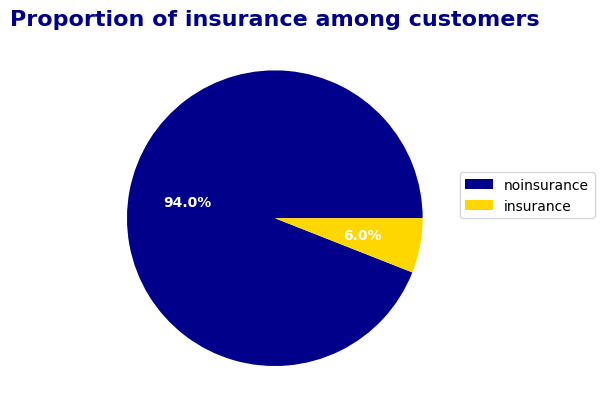

In [574]:
plt.title('Proportion of insurance among customers', fontsize=16, fontweight='bold', color='darkblue')
plt.pie(train_dataset.Target.value_counts(), autopct='%.1f%%', labels=train_dataset.Target.value_counts().index,textprops = {'fontweight':'bold', 'fontsize':'medium', 'color':'white'}, colors=['darkblue', 'gold'])
plt.legend(loc=(1,0.5))
plt.savefig('images/target.png')

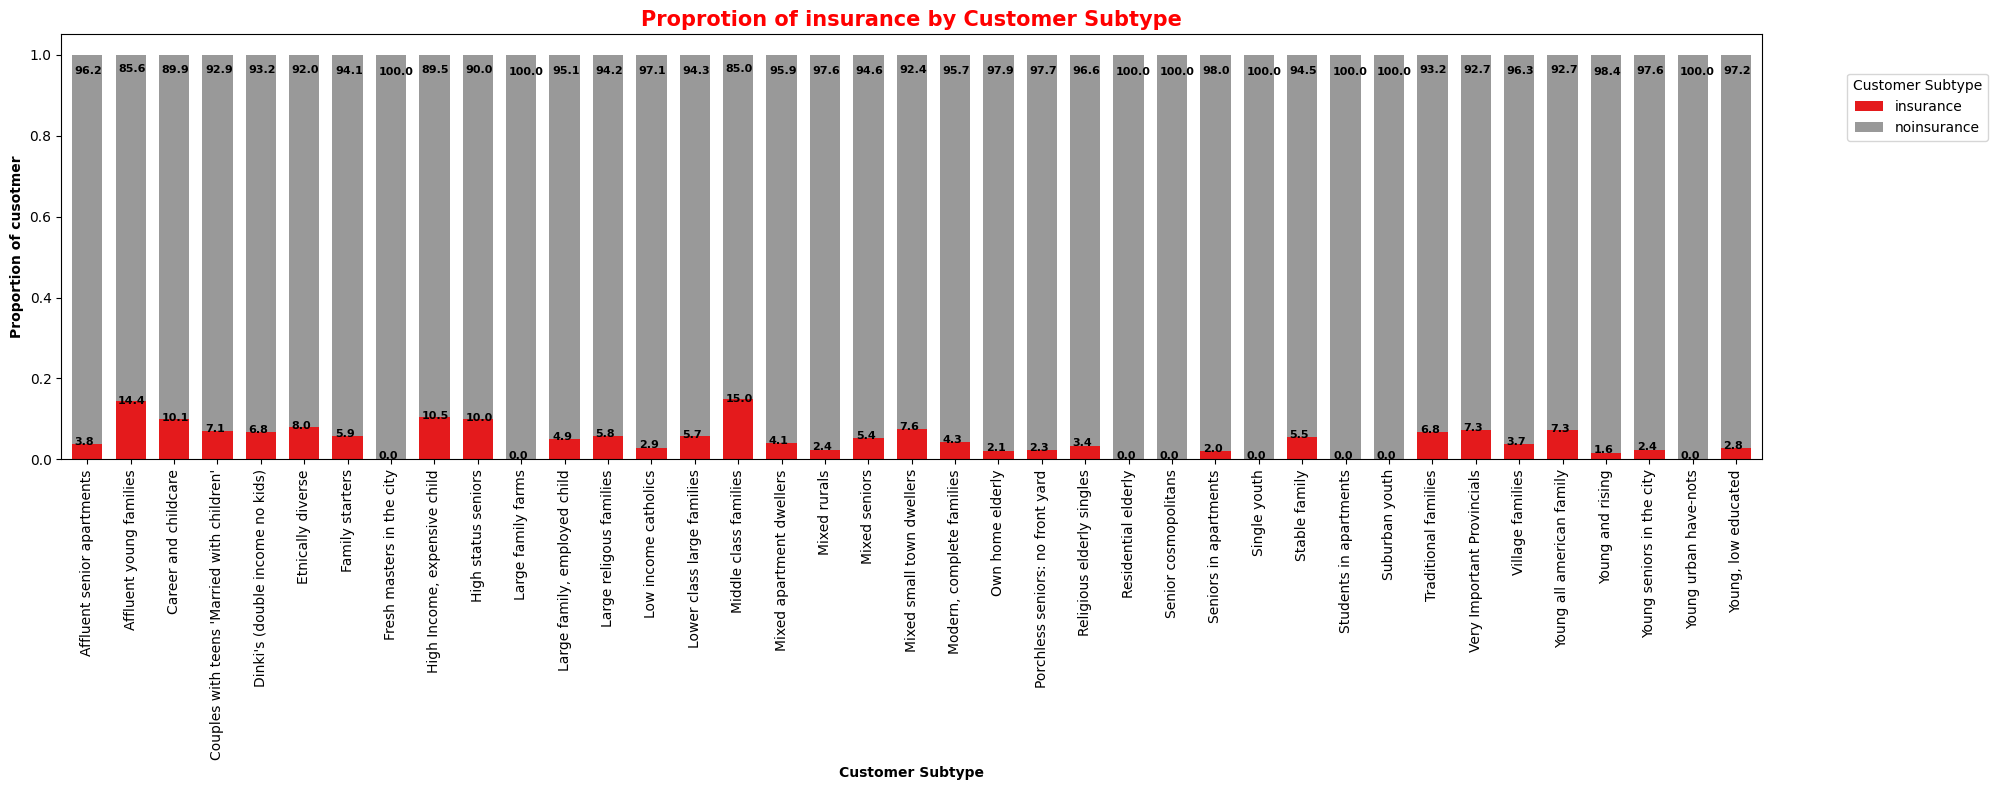

In [550]:
cross_tab_prop = pd.crosstab(index=sociademographic['Customer Subtype'],
                             columns=sociademographic.Target,
                             normalize="index")
cross_tab = pd.crosstab(index=sociademographic['Customer Subtype'],
                             columns=sociademographic.Target)


# plt.figure()
# plt.subplot(211)
stacked =cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(20, 8), legend={'location':(1.15,0.6)}, width=0.7)
stacked.set_title('Proprotion of insurance by Customer Subtype', fontsize=15, fontweight='bold', color='r')
stacked.set_xlabel("Customer Subtype", fontweight='bold',)
stacked.set_ylabel("Proportion of cusotmer",fontweight='bold',)
stacked.legend(title='Customer Subtype',loc=(1.05,0.75))
stacked.set_xticklabels(cross_tab.index, rotation =90)
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        stacked.text(x=n - 0.29,
                 y=(y_loc - proportion) + (0.95*proportion),
                 s=f'{np.round(proportion * 100, 1)}', 
                 color="black",
                 fontsize=8,
                 fontweight="bold")

plt.tight_layout()
# plt.subplot(212)
plt.savefig('images/stack.png', dpi=300)
        

In [555]:
sociademographic.groupby('Customer Subtype').count()['Target'].sort_values(ascending=False).reset_index()

,Customer Subtype,Target
0,Lower class large families,810
1,Middle class families,339
2,Traditional families,339
3,Large religous families,328
4,"Modern, complete families",278
5,Young and rising,251
6,High status seniors,249
7,Couples with teens 'Married with children',225
8,Village families,214
9,Mixed rurals,205


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Lower class large families'),
  Text(1, 0, 'Middle class families'),
  Text(2, 0, 'Traditional families'),
  Text(3, 0, 'Large religous families'),
  Text(4, 0, 'Modern, complete families'),
  Text(5, 0, 'Young and rising'),
  Text(6, 0, 'High status seniors'),
  Text(7, 0, "Couples with teens 'Married with children'"),
  Text(8, 0, 'Village families'),
  Text(9, 0, 'Mixed rurals'),
  Text(10, 0, 'Low income catholics'),
  Text(11, 0, 'Mixed seniors'),
  Text(12, 0, 'Large family, employed child'),
  Text(13, 0, 'Young, low educated'),
  Text(14, 0, 'Young all american family'),
  Text(15, 0, 'Stable family'),
  Text(16, 0, 'Family starters'),
  Text(17, 0, 'Mixed small town dwellers'),
  Text(18, 0, 'High Income, expensive child'),
  Text(19, 0, 'Career and childcare'),
  Text(20, 0, 'Religio

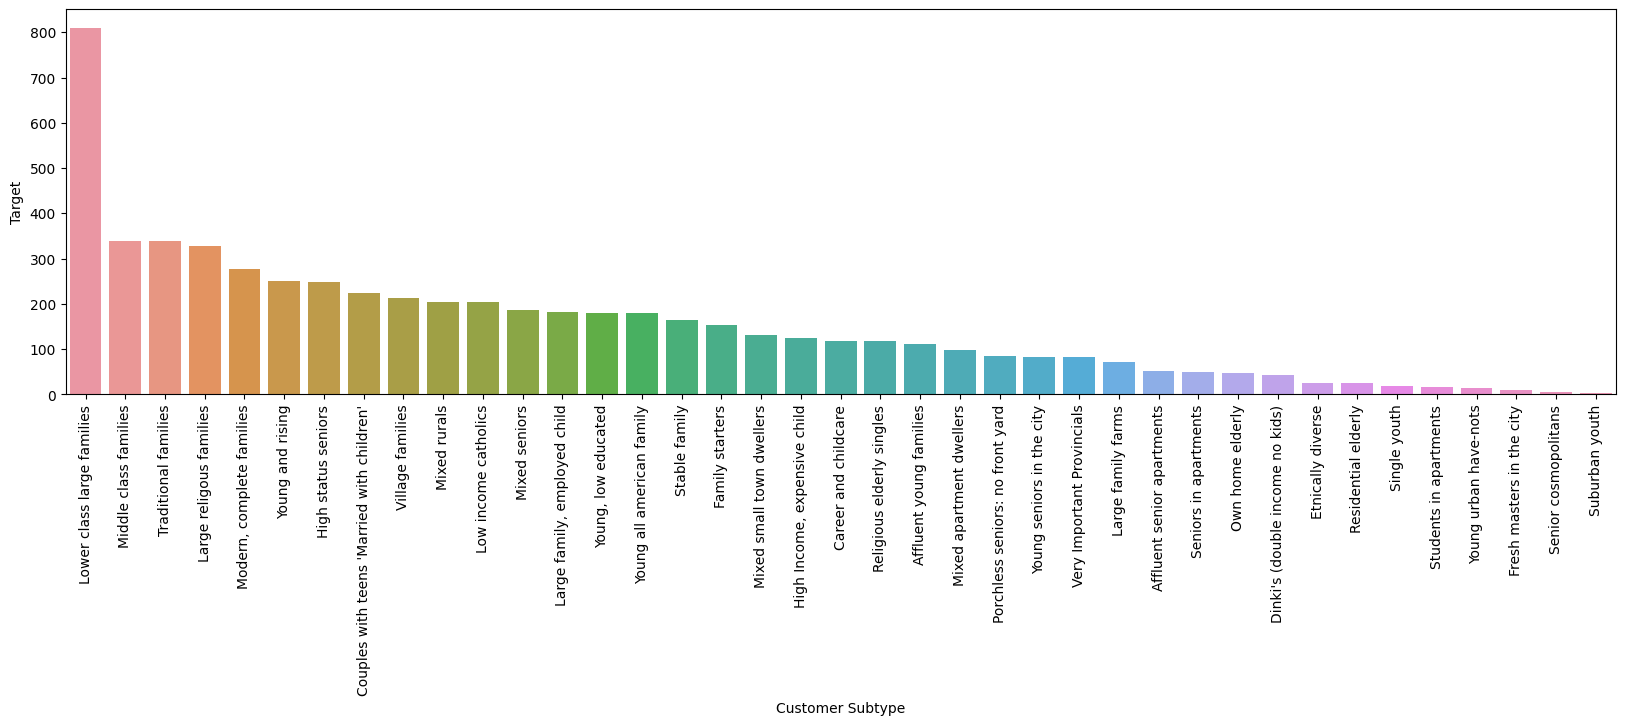

In [561]:
plt.figure(figsize=(20,5))
sns.barplot(data=sociademographic.groupby('Customer Subtype').count()['Target'].sort_values(ascending=False).reset_index(), x='Customer Subtype', y='Target')
plt.xticks(rotation=90)

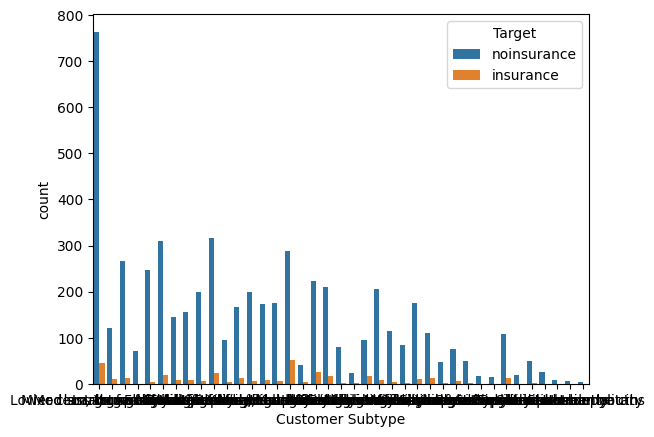

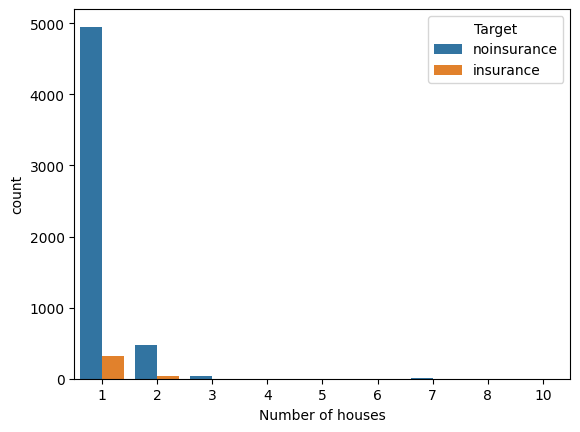

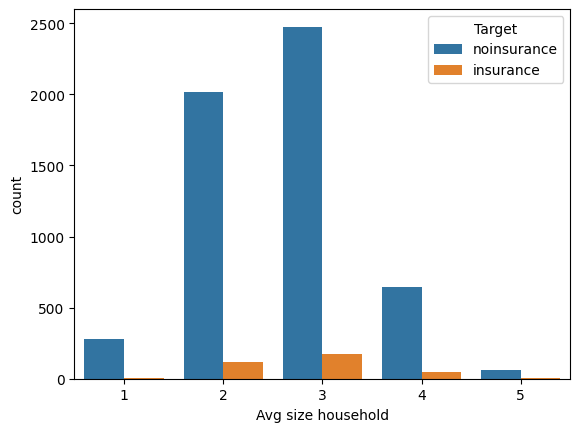

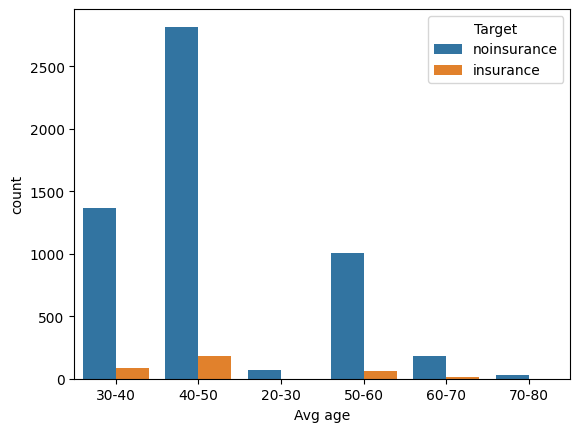

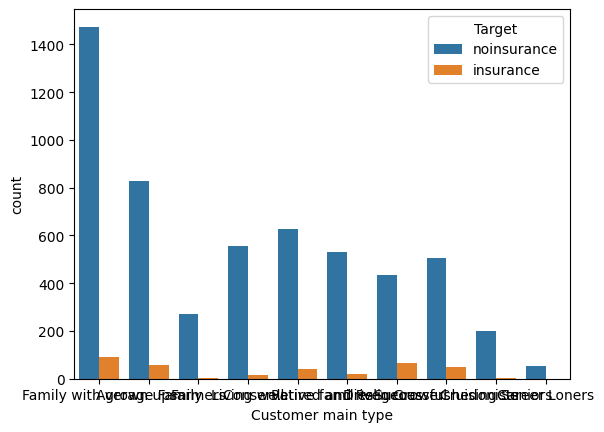

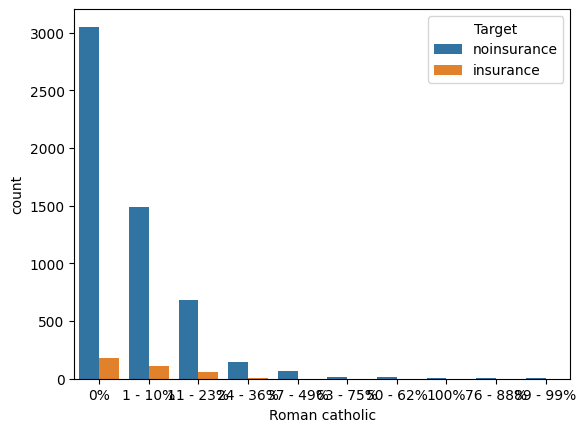

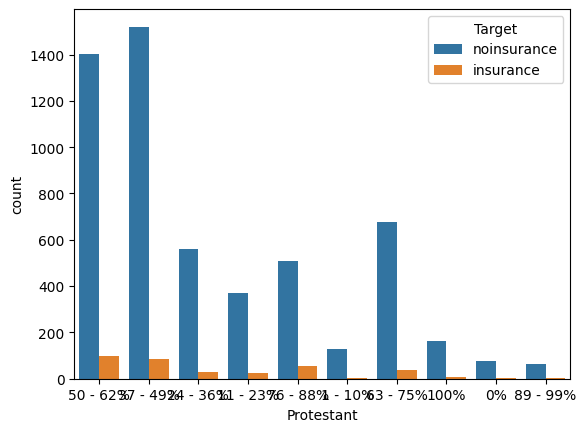

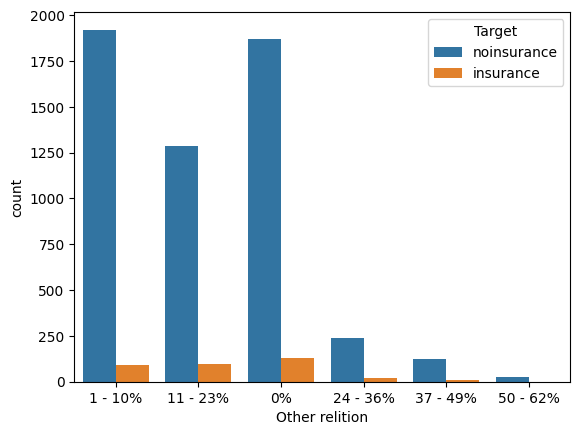

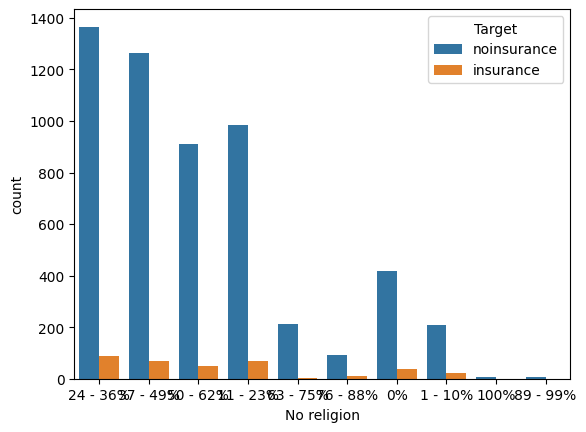

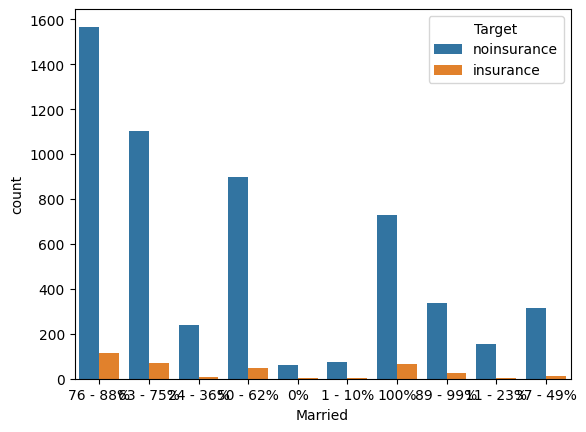

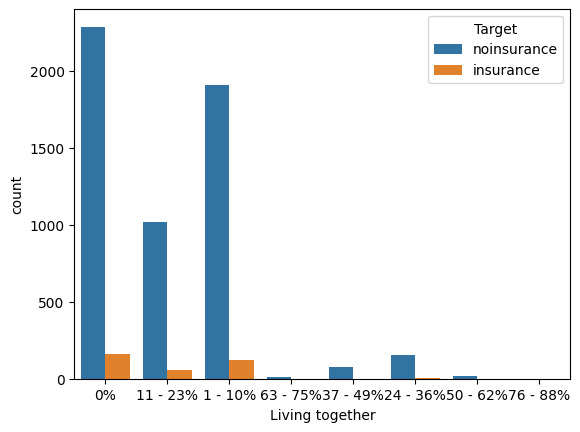

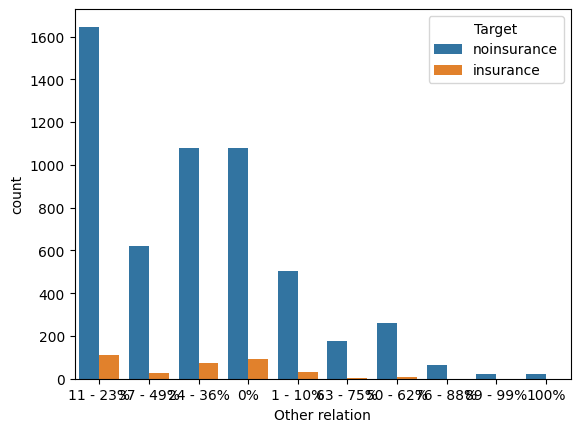

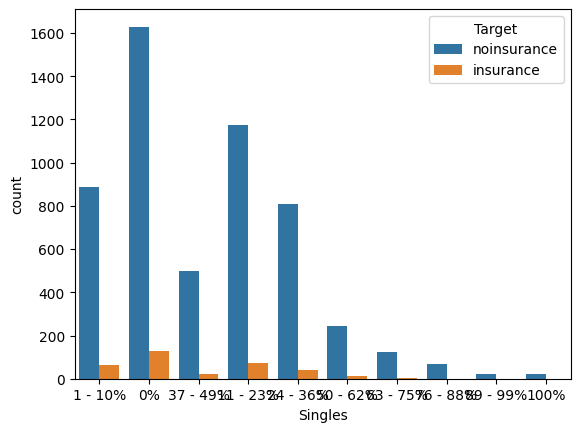

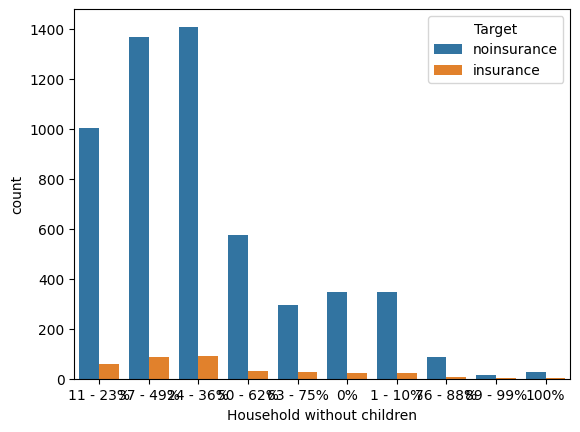

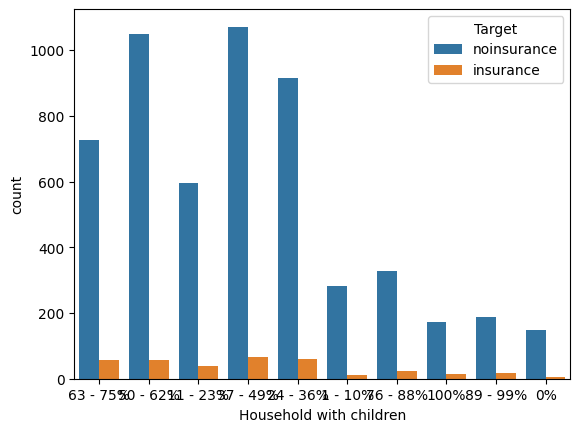

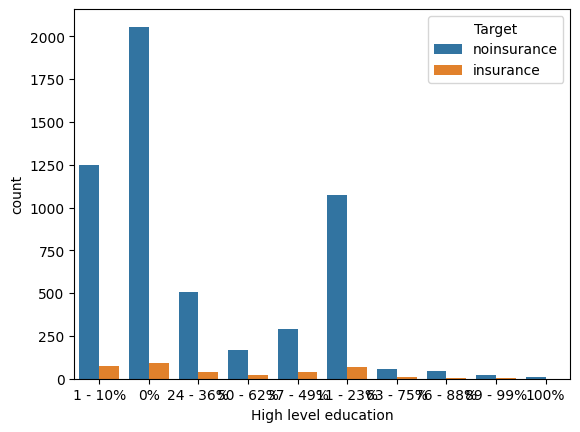

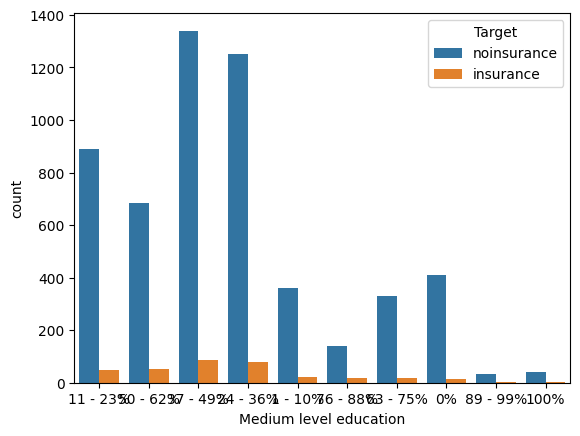

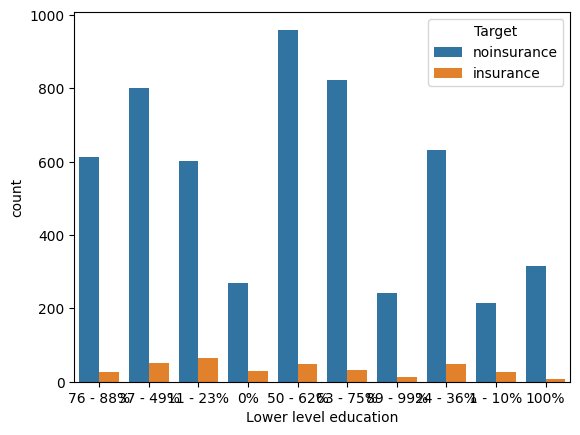

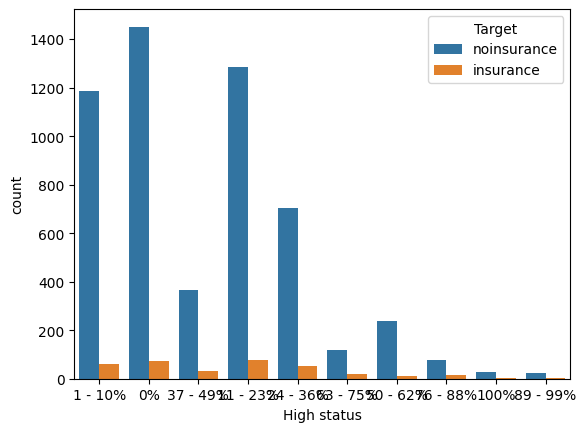

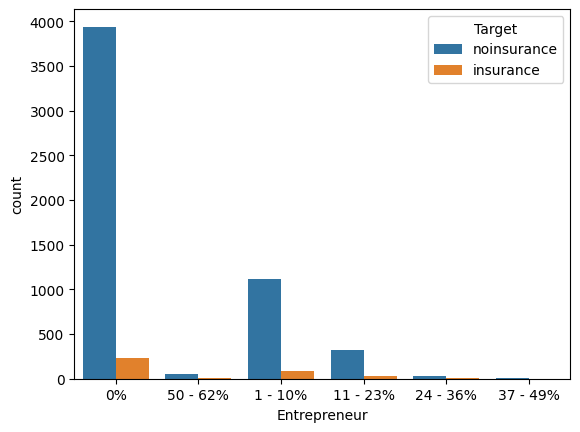

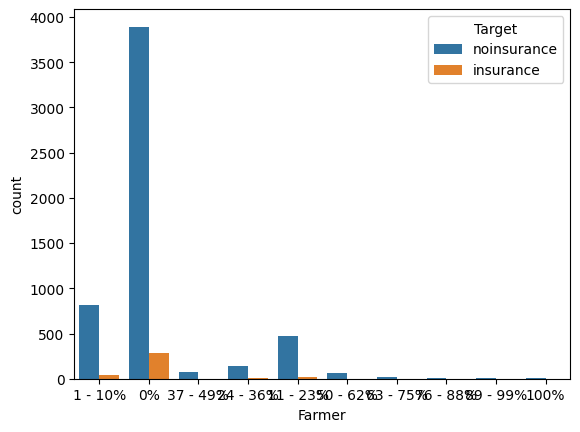

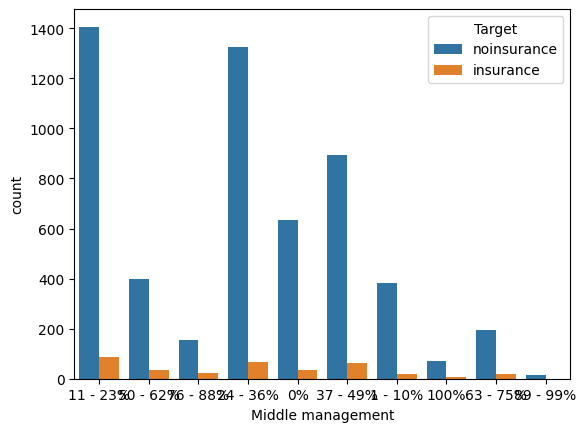

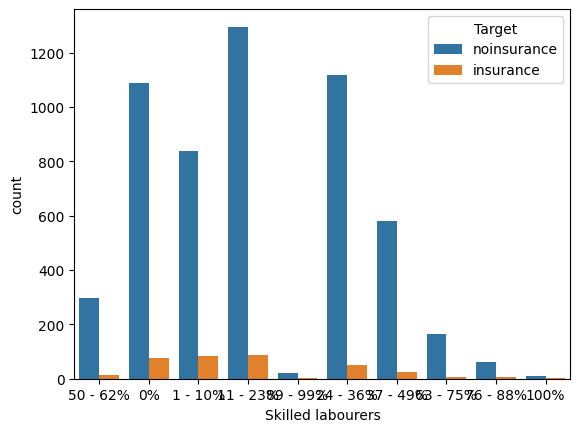

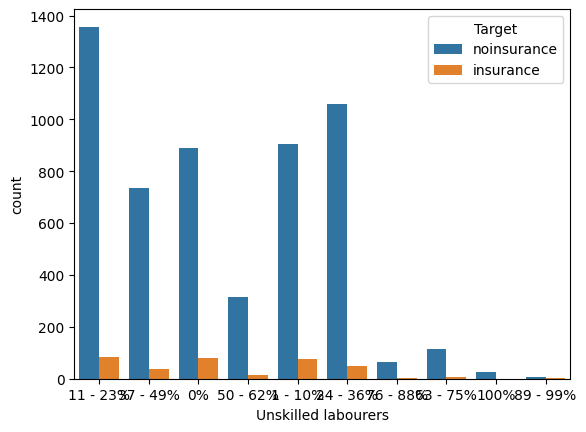

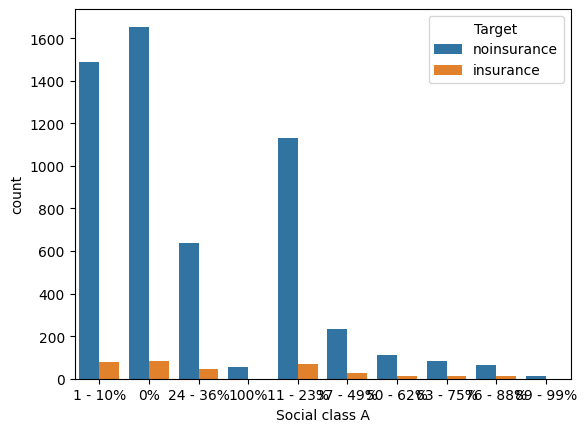

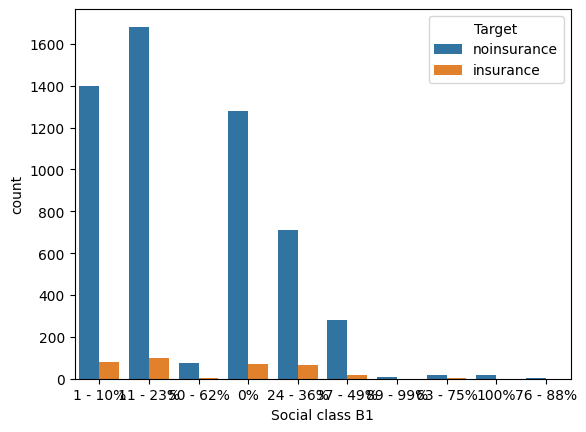

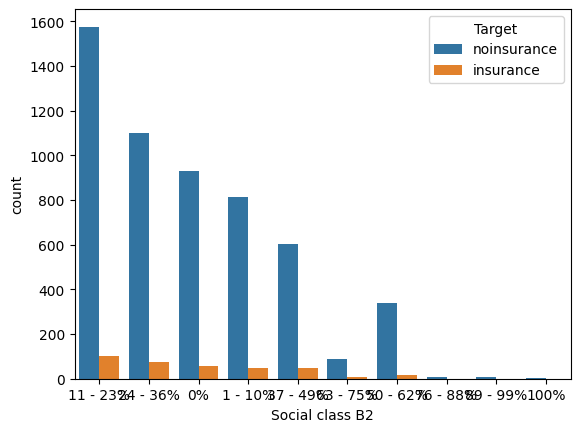

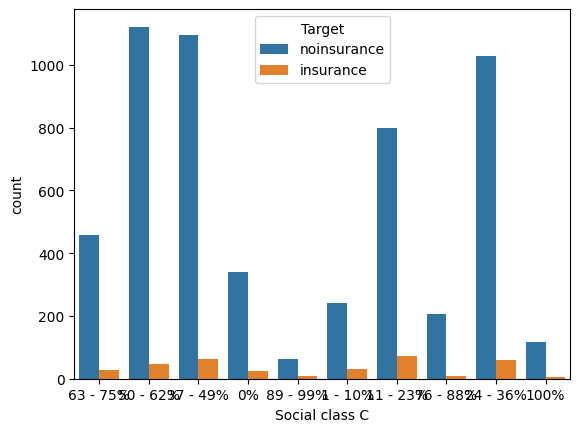

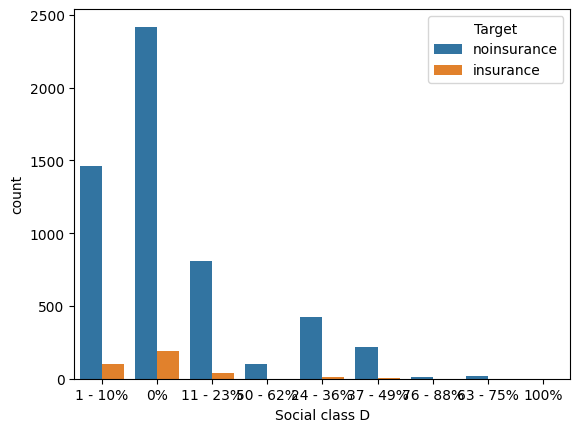

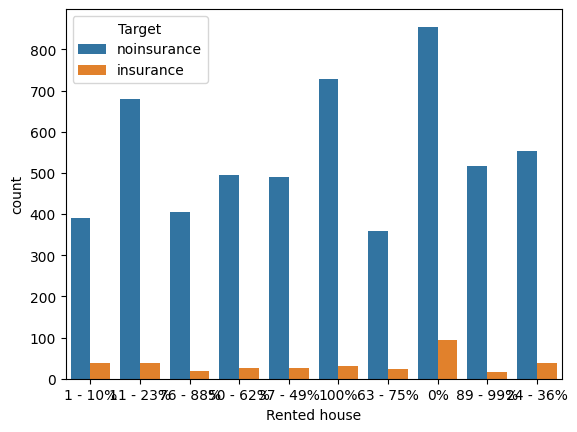

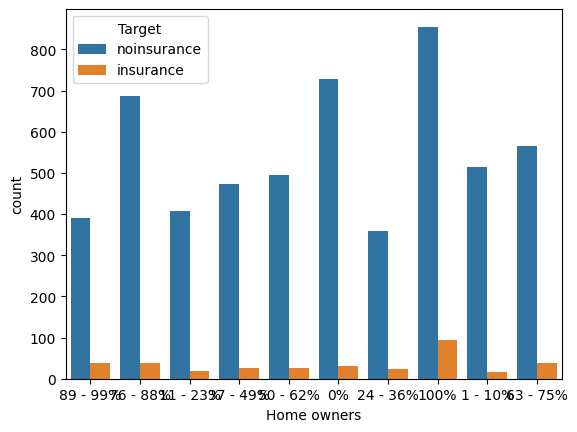

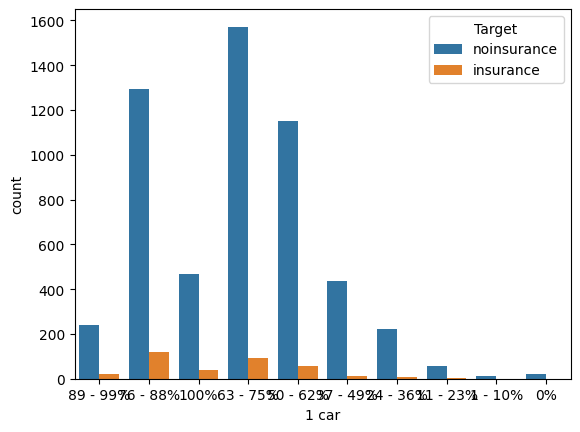

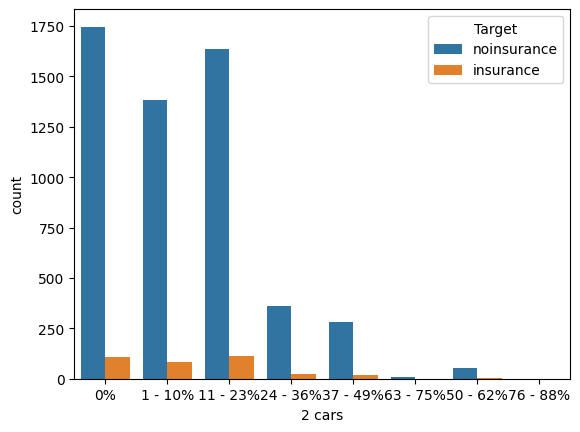

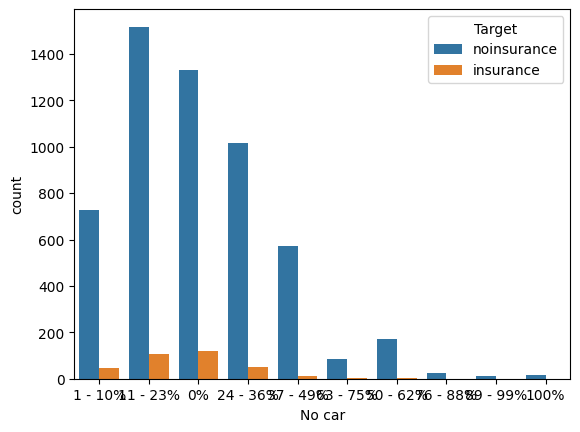

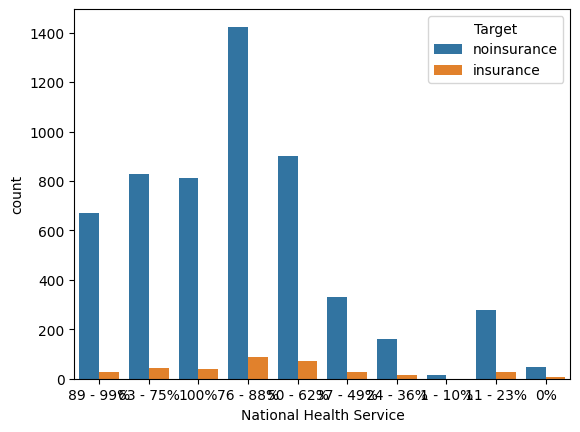

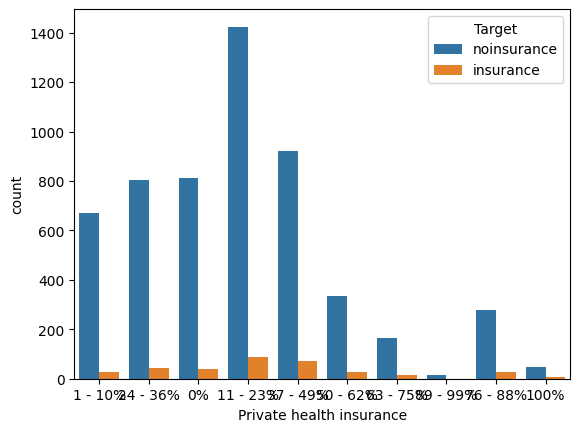

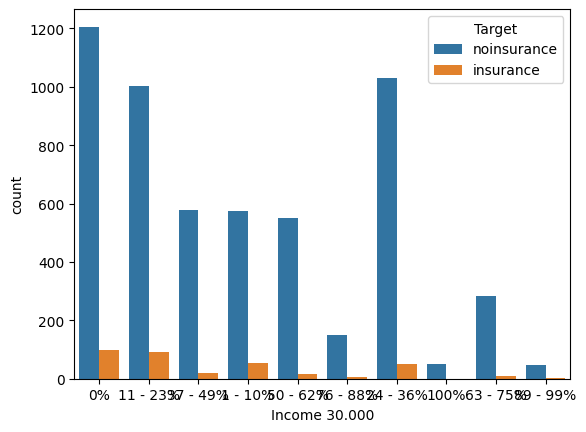

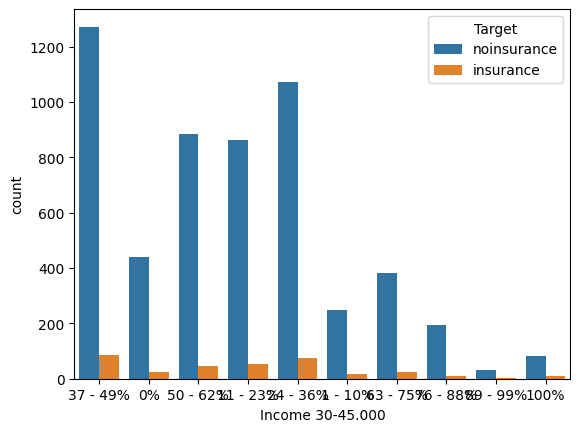

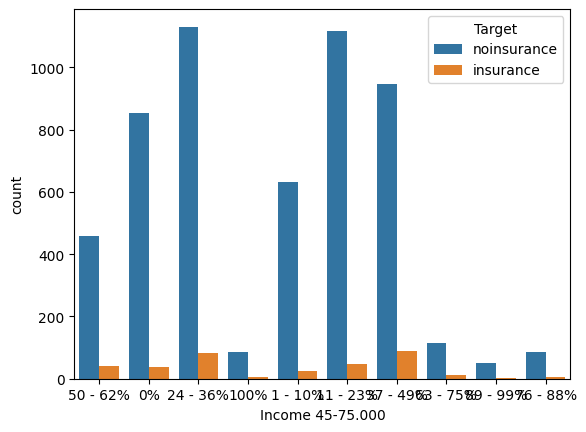

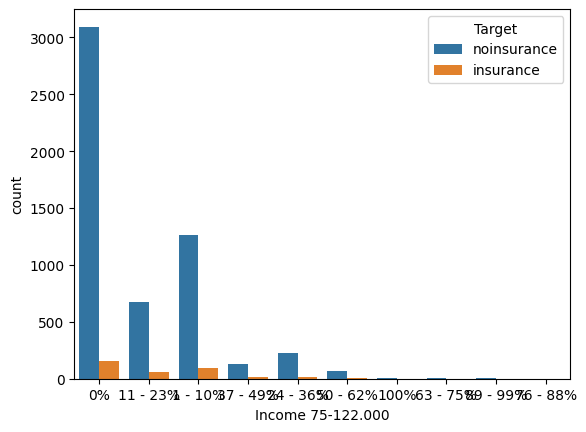

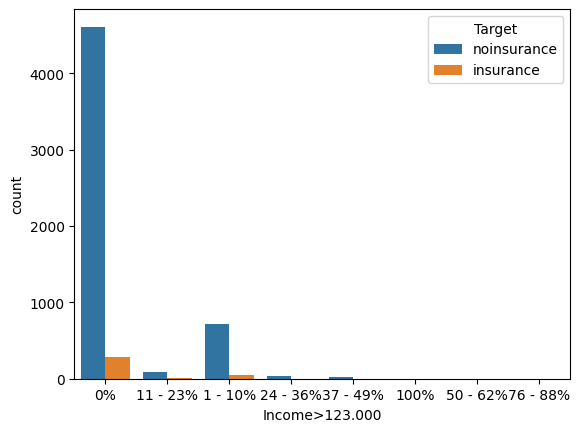

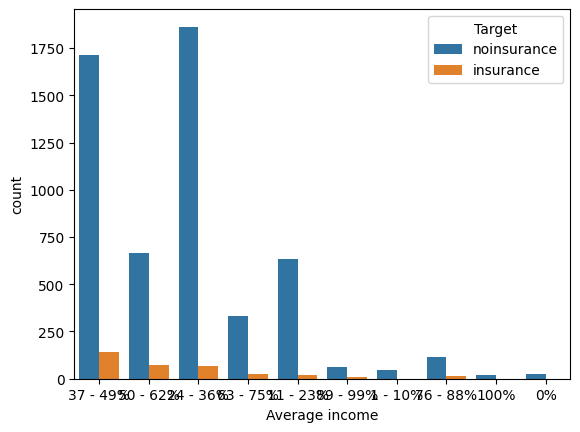

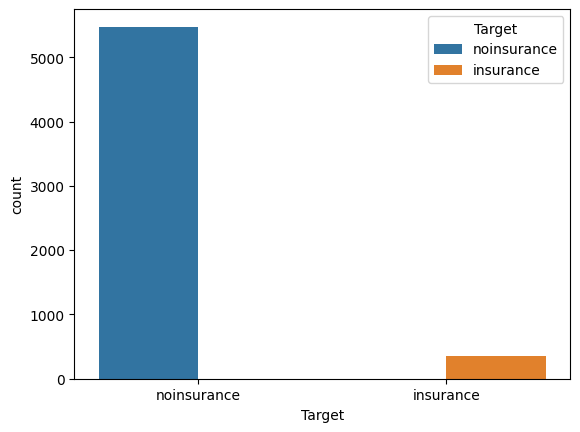

In [499]:
for i in sociademographic.columns:
    sns.countplot(data=sociademographic, x=i, hue='Target')
    plt.show()